In [43]:
import sys
sys.version

'3.6.0 (default, Feb 26 2017, 20:43:59) \n[GCC 5.4.0 20160609]'

In [44]:
import tensorflow as tf
tf.__version__

'1.0.0'

In [45]:
import matplotlib.pyplot as plt

### Linear Regression

H(x) = W(x) + b

cost(W,b) = 1/m sig( h(x(i)) - y(i) ) ^2

In [46]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

h = W * x_data + b

print(h)
cost = tf.reduce_mean(tf.square(h - y_data))

Tensor("add_6:0", shape=(3,), dtype=float32)


In [47]:
a = tf.Variable(0.1) #Learninig rate
optimizer = tf.train.GradientDescentOptimizer(a)
init = tf.global_variables_initializer()
train = optimizer.minimize(cost)
sess = tf.Session()
sess.run(init)


In [48]:
for step in range(2000):
    sess.run(train)
    if step % 20 == 0:
        print(step,sess.run(cost),sess.run(W), sess.run(b))

0 0.0776009 [ 0.66442883] [ 0.72143012]
20 0.0287373 [ 0.80311227] [ 0.44757217]
40 0.0108577 [ 0.87897772] [ 0.275112]
60 0.00410234 [ 0.92561042] [ 0.1691048]
80 0.00154997 [ 0.95427459] [ 0.10394475]
100 0.000585623 [ 0.97189367] [ 0.06389237]
120 0.000221265 [ 0.98272365] [ 0.03927311]
140 8.35991e-05 [ 0.98938066] [ 0.02414022]
160 3.15861e-05 [ 0.99347258] [ 0.0148384]
180 1.19339e-05 [ 0.99598771] [ 0.00912082]
200 4.50898e-06 [ 0.99753374] [ 0.00560633]
220 1.70356e-06 [ 0.99848408] [ 0.00344606]
240 6.43704e-07 [ 0.9990682] [ 0.00211814]
260 2.43179e-07 [ 0.99942732] [ 0.00130196]
280 9.18769e-08 [ 0.99964797] [ 0.00080027]
300 3.46928e-08 [ 0.99978364] [ 0.00049187]
320 1.31165e-08 [ 0.99986702] [ 0.00030235]
340 4.95829e-09 [ 0.99991822] [ 0.00018581]
360 1.86602e-09 [ 0.99994975] [ 0.00011417]
380 7.06488e-10 [ 0.99996912] [  7.02062680e-05]
400 2.676e-10 [ 0.99998093] [  4.31378139e-05]
420 1.01773e-10 [ 0.99998832] [  2.65677209e-05]
440 3.84688e-11 [ 0.99999285] [  1.629

### With placeholder


In [49]:
x_data = [1., 2., 3.]
y_data = [1., 2., 3.]

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

h = W * X + b
cost = tf.reduce_mean(tf.square(h - Y))
a = tf.Variable(0.1)
init = tf.global_variables_initializer()
opt = tf.train.GradientDescentOptimizer(a)
train = opt.minimize(cost)

sess = tf.Session()
sess.run(init)

In [50]:
for step in range(2000):
    sess.run(train,feed_dict={X:x_data, Y:y_data})
    if step % 20 == 0:
        print(step,sess.run(cost,feed_dict={X:x_data, Y:y_data}),sess.run(W), sess.run(b))

0 0.208318 [ 0.67133313] [ 1.02652621]
20 0.0521857 [ 0.7346791] [ 0.60313684]
40 0.0197171 [ 0.83691359] [ 0.37073383]
60 0.00744966 [ 0.89975464] [ 0.22788128]
80 0.00281468 [ 0.93838155] [ 0.14007321]
100 0.00106346 [ 0.96212465] [ 0.0860997]
120 0.000401805 [ 0.9767189] [ 0.05292342]
140 0.000151813 [ 0.98568964] [ 0.0325308]
160 5.73588e-05 [ 0.99120373] [ 0.01999592]
180 2.16718e-05 [ 0.9945932] [ 0.01229101]
200 8.188e-06 [ 0.99667656] [ 0.00755501]
220 3.0939e-06 [ 0.99795711] [ 0.00464387]
240 1.16883e-06 [ 0.99874431] [ 0.00285449]
260 4.41575e-07 [ 0.99922812] [ 0.00175457]
280 1.66892e-07 [ 0.99952555] [ 0.00107855]
300 6.30523e-08 [ 0.99970835] [ 0.00066297]
320 2.38371e-08 [ 0.99982071] [ 0.00040754]
340 9.00379e-09 [ 0.99988973] [ 0.00025052]
360 3.40038e-09 [ 0.99993223] [ 0.000154]
380 1.2873e-09 [ 0.99995834] [  9.46714790e-05]
400 4.87963e-10 [ 0.99997443] [  5.81775348e-05]
420 1.83078e-10 [ 0.9999842] [  3.57264507e-05]
440 6.96e-11 [ 0.99999028] [  2.19696958e-05]

### Predict value with feed

In [51]:
print( sess.run(h, feed_dict={X:5}) )

[ 5.]


In [52]:
print( sess.run(h, feed_dict={X:2.3}) )

[ 2.29999995]


### Cost minizied(desent algorithm)

-3.0 74.6667
-2.9000000000000004 70.98
-2.8000000000000003 67.3867
-2.7 63.8867
-2.6 60.48
-2.5 57.1667
-2.4000000000000004 53.9467
-2.3000000000000003 50.82
-2.2 47.7867
-2.1 44.8467
-2.0 42.0
-1.9000000000000001 39.2467
-1.8 36.5867
-1.7000000000000002 34.02
-1.6 31.5467
-1.5 29.1667
-1.4000000000000001 26.88
-1.3 24.6867
-1.2000000000000002 22.5867
-1.1 20.58
-1.0 18.6667
-0.9 16.8467
-0.8 15.12
-0.7000000000000001 13.4867
-0.6000000000000001 11.9467
-0.5 10.5
-0.4 9.14666
-0.30000000000000004 7.88667
-0.2 6.72
-0.1 5.64667
0.0 4.66667
0.1 3.78
0.2 2.98667
0.30000000000000004 2.28667
0.4 1.68
0.5 1.16667
0.6000000000000001 0.746667
0.7000000000000001 0.42
0.8 0.186667
0.9 0.0466667
1.0 0.0
1.1 0.0466667
1.2000000000000002 0.186667
1.3 0.42
1.4000000000000001 0.746666
1.5 1.16667
1.6 1.68
1.7000000000000002 2.28667
1.8 2.98667
1.9000000000000001 3.78
2.0 4.66667
2.1 5.64667
2.2 6.72
2.3000000000000003 7.88667
2.4000000000000004 9.14667
2.5 10.5
2.6 11.9467
2.7 13.4867
2.8000000000000

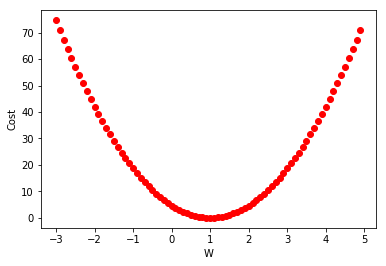

In [53]:
X = [1., 2., 3.]
Y = [1., 2., 3.]
m = n_samples = len(X)

W = tf.placeholder(tf.float32)
h = tf.multiply(X,W)

cost = tf.reduce_sum(tf.pow(h - Y, 2))/(m)
init = tf.global_variables_initializer()

W_val = []
cost_val = []

sess = tf.Session()
sess.run(init)
for i in range(-30, 50):
    print(i*0.1, sess.run(cost, feed_dict={W: i*0.1}))
    W_val.append(i*0.1)
    cost_val.append(sess.run(cost, feed_dict={W: i*0.1}))
    
plt.plot(W_val, cost_val, 'ro')
plt.ylabel('Cost')
plt.xlabel('W')

plt.show()

### minimized

In [54]:
x_data = [1., 2., 3.]
y_data = [1., 2., 3.]

W = tf.Variable(tf.random_uniform([1], -10.0, 10.0))
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

h = W * X

cost = tf.reduce_mean(tf.square(h - Y))
descent = W - tf.multiply(0.1, tf.reduce_mean(tf.multiply((tf.multiply(W,X) - Y), X)))
update = W.assign(descent)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for step in range(100):
    sess.run(update, feed_dict={X:x_data, Y:y_data})
    print(step,sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))


0 111.125 [-3.879807]
1 31.6089 [-1.60256362]
2 8.99098 [-0.38803387]
3 2.55743 [ 0.25971526]
4 0.727448 [ 0.60518146]
5 0.206918 [ 0.78943014]
6 0.0588568 [ 0.88769609]
7 0.0167415 [ 0.9401046]
8 0.00476202 [ 0.96805578]
9 0.00135453 [ 0.98296309]
10 0.00038529 [ 0.99091363]
11 0.000109592 [ 0.99515396]
12 3.11741e-05 [ 0.99741542]
13 8.86649e-06 [ 0.99862158]
14 2.522e-06 [ 0.99926484]
15 7.17483e-07 [ 0.99960792]
16 2.04026e-07 [ 0.99979091]
17 5.8025e-08 [ 0.99988848]
18 1.64989e-08 [ 0.99994051]
19 4.69235e-09 [ 0.99996829]
20 1.33722e-09 [ 0.99998307]
21 3.76954e-10 [ 0.999991]
22 1.09354e-10 [ 0.99999517]
23 3.03508e-11 [ 0.99999744]
24 8.60823e-12 [ 0.99999863]
25 2.38742e-12 [ 0.99999928]
26 5.16328e-13 [ 0.99999964]
27 1.29082e-13 [ 0.99999982]
28 9.9476e-14 [ 0.99999988]
29 2.4869e-14 [ 0.99999994]
30 0.0 [ 1.]
31 0.0 [ 1.]
32 0.0 [ 1.]
33 0.0 [ 1.]
34 0.0 [ 1.]
35 0.0 [ 1.]
36 0.0 [ 1.]
37 0.0 [ 1.]
38 0.0 [ 1.]
39 0.0 [ 1.]
40 0.0 [ 1.]
41 0.0 [ 1.]
42 0.0 [ 1.]
43 0.0 [ 1